In [2]:
# cnn model
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint
from keras import optimizers
from matplotlib import pyplot
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import time

Using TensorFlow backend.


In [4]:
df = pd.read_csv('Ethanol.csv', header = None)
n_features=1
X = df.drop(df.columns[[0]], axis=1).values
y = df[df.columns[[0]]].values

scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

trainX, testX, trainy, testy = train_test_split(
                                    X, y, test_size=0.10,random_state=42)
trainX=trainX.reshape((trainX.shape[0], trainX.shape[1], n_features))
testX=testX.reshape((testX.shape[0], testX.shape[1], n_features))
trainy = trainy - 1
testy = testy - 1
# one hot encode y
trainy = to_categorical(trainy)
testy = to_categorical(testy)

In [3]:
n_timesteps,n_features

NameError: name 'n_timesteps' is not defined

Epoch 1/150
903/903 [==============================] - 2s 2ms/step - loss: 1.4239 - acc: 0.2746
Epoch 2/150
903/903 [==============================] - 1s 1ms/step - loss: 1.3620 - acc: 0.3389
Epoch 3/150
903/903 [==============================] - 1s 1ms/step - loss: 1.3351 - acc: 0.3965
Epoch 4/150
903/903 [==============================] - 1s 1ms/step - loss: 1.2726 - acc: 0.4374
Epoch 5/150
903/903 [==============================] - 1s 1ms/step - loss: 1.2649 - acc: 0.3865
Epoch 6/150
903/903 [==============================] - 1s 1ms/step - loss: 1.1852 - acc: 0.4928
Epoch 7/150
903/903 [==============================] - 1s 1ms/step - loss: 1.1305 - acc: 0.5249
Epoch 8/150
903/903 [==============================] - 1s 1ms/step - loss: 1.0782 - acc: 0.5271
Epoch 9/150
903/903 [==============================] - 1s 1ms/step - loss: 1.0302 - acc: 0.5670
Epoch 10/150
903/903 [==============================] - 1s 1ms/step - loss: 0.9563 - acc: 0.6024
Epoch 11/150
903/903 [=================

Epoch 13/150
903/903 [==============================] - 1s 1ms/step - loss: 0.0603 - acc: 0.9845 - val_loss: 0.3607 - val_acc: 0.8416
Epoch 14/150
903/903 [==============================] - 1s 1ms/step - loss: 0.0803 - acc: 0.9745 - val_loss: 0.3221 - val_acc: 0.8812
Epoch 15/150
903/903 [==============================] - 1s 1ms/step - loss: 0.0577 - acc: 0.9867 - val_loss: 0.4010 - val_acc: 0.8713
Epoch 16/150
903/903 [==============================] - 1s 1ms/step - loss: 0.0585 - acc: 0.9867 - val_loss: 0.3698 - val_acc: 0.8416
Epoch 17/150
903/903 [==============================] - 1s 1ms/step - loss: 0.0557 - acc: 0.9867 - val_loss: 0.4023 - val_acc: 0.8515
Epoch 18/150
903/903 [==============================] - 1s 1ms/step - loss: 0.0461 - acc: 0.9889 - val_loss: 0.3540 - val_acc: 0.8515
Epoch 19/150
903/903 [==============================] - 1s 1ms/step - loss: 0.0435 - acc: 0.9934 - val_loss: 0.4176 - val_acc: 0.8614
Epoch 20/150
903/903 [==============================] - 1s 1ms

Epoch 135/150
903/903 [==============================] - 1s 1ms/step - loss: 0.0390 - acc: 0.9845 - val_loss: 0.3188 - val_acc: 0.8713
Epoch 136/150
903/903 [==============================] - 1s 1ms/step - loss: 0.0255 - acc: 0.9922 - val_loss: 0.3997 - val_acc: 0.8218
Epoch 137/150
903/903 [==============================] - 1s 1ms/step - loss: 0.0258 - acc: 0.9911 - val_loss: 0.4217 - val_acc: 0.8713
Epoch 138/150
903/903 [==============================] - 1s 1ms/step - loss: 0.0263 - acc: 0.9922 - val_loss: 0.4174 - val_acc: 0.8614
Epoch 139/150
903/903 [==============================] - 1s 1ms/step - loss: 0.0284 - acc: 0.9889 - val_loss: 0.4069 - val_acc: 0.8416
Epoch 140/150
903/903 [==============================] - 1s 1ms/step - loss: 0.0198 - acc: 0.9978 - val_loss: 0.4319 - val_acc: 0.8317
Epoch 141/150
903/903 [==============================] - 1s 1ms/step - loss: 0.0205 - acc: 0.9934 - val_loss: 0.4082 - val_acc: 0.8614
Epoch 142/150
903/903 [==============================] 

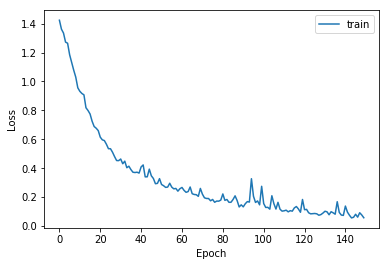

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 1732, 15)          315       
_________________________________________________________________
dropout_6 (Dropout)          (None, 1732, 15)          0         
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 866, 15)           0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 12990)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               1662848   
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 516       
Total params: 1,663,679
Trainable params: 1,663,679
Non-trainable params: 0
_________________________________________________________________


In [20]:
# fit and evaluate a model

verbose, epochs, batch_size = 1, 150, 50
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
model = Sequential()
model.add(Conv1D(filters=15, kernel_size=20, activation='relu', input_shape=(n_timesteps,n_features)))
#model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))

#opt = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, decay=0.01)
checkpoint = ModelCheckpoint("MODEL", monitor='val_loss', verbose=0, 
                                 save_best_only=True, mode='min')
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
Trained=model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=1 ,shuffle=True, 
                      callbacks=[checkpoint], validation_data=(testX, testy))

# evaluate model


pyplot.xlabel('Epoch')
pyplot.ylabel('Loss')
pyplot.plot(Trained.history['loss'],     label='train')
#pyplot.plot(Trained.history['val_loss'], label='eval')
pyplot.legend()
pyplot.show()
model.summary()

In [8]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

model1 = tf.keras.models.load_model('MODEL')

a = model1.predict(testX)
b = np.zeros_like(a)
b[np.arange(len(a)), a.argmax(1)] = 1


Y_pred = np.argmax(b, axis=1)
Y_true = np.argmax(testy,  axis=1)

#for i in range(150,160):
#    print(Y_pred[i], Y_true[i])

print("Confusion Matrix:")
print(confusion_matrix(Y_true, Y_pred))

print("\n Classification Report:")
target_classes = ['No event 0 (-)', 'Event 1 (+)', 'Event 2 (+)','Event 3 (+)']
print(classification_report(Y_true, Y_pred, target_names=target_classes))

Confusion Matrix:
[[16  2  0  0]
 [ 3 15  5  0]
 [ 0  2 27  0]
 [ 0  0  0 31]]

 Classification Report:
                precision    recall  f1-score   support

No event 0 (-)       0.84      0.89      0.86        18
   Event 1 (+)       0.79      0.65      0.71        23
   Event 2 (+)       0.84      0.93      0.89        29
   Event 3 (+)       1.00      1.00      1.00        31

     micro avg       0.88      0.88      0.88       101
     macro avg       0.87      0.87      0.87       101
  weighted avg       0.88      0.88      0.88       101



In [5]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.4)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [47]:
#tensorboard --logdir=logs/ 
#first_layer=75
dense_layers = [64,256]
filters = [15,40,28]
kernels = [15,20,24]

In [ ]:

for dense_nodes in dense_layers:#loops sobre dense layers
    for filter1 in filters:#loops sobre nodos
        for kernel in kernels:
            NAME = "{}-kernel-{}-filters-{}-node-{}".format(kernel, filter1, dense_nodes, int(time.time()))#Nombrar cada iteracion
            print(NAME)
            
            n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
            model = Sequential()
            model.add(Conv1D(filters=filter1, kernel_size=kernel, activation='relu', input_shape=(n_timesteps,n_features)))
            model.add(Dropout(0.5))
            model.add(MaxPooling1D(pool_size=2))
            model.add(Flatten())

            #Estas son las capas ocultas que se pueden modificar
            #for _ in range(dense_layer):
               # model.add(Dense(64, activation='relu'))       
               # model.add(Dropout(0.2))
                     
            
            model.add(Dense(dense_nodes, activation='relu'))
            model.add(Dense(n_outputs, activation='softmax'))

            #Verifcacion en Tensorboard
            
            tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))
            filepath="mod/{}".format(NAME)
            
            checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=0, 
                                 save_best_only=True, mode='min')
            #sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
            #ada=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
            
            model.compile(loss='categorical_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'])

            model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=0 ,shuffle=True, 
                      callbacks=[tensorboard,checkpoint], validation_data=(testX, testy))

20-kernel-40-filters-128-node-1554105633
30-kernel-40-filters-128-node-1554106104
20-kernel-15-filters-128-node-1554106578
30-kernel-15-filters-128-node-1554106790


In [ ]:
model.summary()